# Project 1: SAT & ACT Analysis

The first markdown cell in a notebook is a great place to provide an overview of your entire project. You will likely want to at least state your

## Problem Statement

Define the problem you are finding answers for from the data given.

## Executive Summary

If you want to, it's great to use relative links to direct your audience to various sections of a notebook. **HERE'S A DEMONSTRATION WITH THE CURRENT SECTION HEADERS**:

### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here*

In [1]:
#Imports:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [2]:
sat_2017 = pd.read_csv('data/sat_2017.csv')
act_2017 = pd.read_csv('data/act_2017.csv')

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [3]:
#Code:
sat_2017.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [4]:
act_2017.head(10)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

    SAT2017:
    - Sorted by states;alphabetical order, with participation %, Math, ERW & Total score
    - 50 entries, no national references. 
    - Mary land have incorrect Math Score. 
    ACT2017:
    - Sorted by states;alphabetical order, with participation %, Math, Reading, English, Science & 'Composite'
    - 51 entries, with naitonal references. composite score in Wyoming have 'x' in the data. 

#### 4a. Does the data look complete? 

    - SAT2017 does not have the 'national score'
    - Need to search for duplicate and null entries if any
   
  


#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

    - Min-Max Value for SAT: 400 - 1600
        ERB: Min-Max: 200-800 (10 points increment)
        Math: Min-Max: 200-800 (10 points increment)
        Total/Composite: 400-1600
    - Min-Max Value for ACT: 1-36
        Math: 1-36
        Reading: 1-36
        English: 1-36
        Science: 1-36
        Composite: Mean of all 4 subjects : 1-36
        
    - Existence of 20x in Composite and value lesser than min range in sat17 Math

#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [5]:
#removing x in ACT2017
act_2017['Composite'][51]='20.2'

/Users/shaunkse/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [6]:
act_2017['Composite'][51]

'20.2'

In [7]:
#correcting the inappropriate data in sat2017, math score after referencing to updated file
sat_2017['Math'][20]=524

/Users/shaunkse/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [8]:
sat_2017['Math'][20]

524

In [9]:
##correcting the inappropriate data in act2017, science score after referencing to updated file
act_2017['Science'][21]=23.2

/Users/shaunkse/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [10]:
act_2017['Science'][21]

23.2

#### 5. What are your data types? 
Display the data types of each feature. 

In [11]:
sat_2017.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [12]:
act_2017.dtypes

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

    For ACT2017:
    1) Participation is object/string, cause '%'
    2) Composite should be a Float
    For SAT2017:
    1) Participation is object/string, cause '%'
    2) ERW, Math & Total should be Float

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [13]:
# making a function for removing % in Participation via replacing method, 
# then rename the file with the changes made
def stripPercentage(x):
    x['Participation'] = str(x['Participation']).replace('%','')
    return x

In [14]:
act_2017_strip_percent = act_2017.apply(stripPercentage, axis=1)
act_2017_strip_percent.head()

,State,Participation,English,Math,Reading,Science,Composite
0,National,60,20.3,20.7,21.4,21.0,21.0
1,Alabama,100,18.9,18.4,19.7,19.4,19.2
2,Alaska,65,18.7,19.8,20.4,19.9,19.8
3,Arizona,62,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100,18.9,19.0,19.7,19.5,19.4


In [15]:
sat_2017_strip_percent = sat_2017.apply(stripPercentage, axis=1)
sat_2017_strip_percent.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5,593,572,1165
1,Alaska,38,547,533,1080
2,Arizona,30,563,553,1116
3,Arkansas,3,614,594,1208
4,California,53,531,524,1055


- Fix any individual values preventing other columns from being the appropriate type.

In [16]:
#changing dtypes of act_2017
act_2017_strip_percent['Participation']= act_2017_strip_percent['Participation'].apply(float)
act_2017_strip_percent['Composite']= act_2017_strip_percent['Composite'].apply(float)


In [17]:
#changing dtypes of sat_2017
sat_2017_strip_percent['Participation']= sat_2017_strip_percent['Participation'].apply(float)
sat_2017_strip_percent['Evidence-Based Reading and Writing']= sat_2017_strip_percent['Evidence-Based Reading and Writing'].apply(float)
sat_2017_strip_percent['Math']= sat_2017_strip_percent['Math'].apply(float)
sat_2017_strip_percent['Total']= sat_2017_strip_percent['Total'].apply(float)


- Display the data types again to confirm they are correct.

In [18]:
sat_2017_strip_percent.dtypes

State                                  object
Participation                         float64
Evidence-Based Reading and Writing    float64
Math                                  float64
Total                                 float64
dtype: object

In [19]:
act_2017_strip_percent.dtypes

State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [20]:
#sat_2017_strip_percent.columns.tolist()

headers_sat_2017 = list(sat_2017_strip_percent.columns)
headers_sat_2017

['State',
 'Participation',
 'Evidence-Based Reading and Writing',
 'Math',
 'Total']

In [21]:
#act_2017_strip_percent.columns.tolist()
headers_act_2017 = list(act_2017_strip_percent.columns)
headers_act_2017

['State',
 'Participation',
 'English',
 'Math',
 'Reading',
 'Science',
 'Composite']

In [23]:
#making a function to read a file, to rename and change the headers to lower case, and replacing ' ' with '_'

In [24]:
def change_header_name(header_name, paper_type, year):
    changed_header = []
    for x in header_name:
        if x.lower() == 'state':
            changed_header.append(x.lower())
        else:
            changed_header.append((x + '_' + paper_type + '_' + year).lower().replace(' ','_'))
            
    return changed_header

In [25]:
change_header_name(headers_act_2017, 'act', '2017')

['state',
 'participation_act_2017',
 'english_act_2017',
 'math_act_2017',
 'reading_act_2017',
 'science_act_2017',
 'composite_act_2017']

In [26]:
modifed_act_2017 = act_2017_strip_percent.copy()
modifed_act_2017.columns = change_header_name(headers_act_2017, 'act', '2017')
modifed_act_2017.head()

,state,participation_act_2017,english_act_2017,math_act_2017,reading_act_2017,science_act_2017,composite_act_2017
0,National,60.0,20.3,20.7,21.4,21.0,21.0
1,Alabama,100.0,18.9,18.4,19.7,19.4,19.2
2,Alaska,65.0,18.7,19.8,20.4,19.9,19.8
3,Arizona,62.0,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4


In [27]:
modifed_sat_2017 = sat_2017_strip_percent.copy()
modifed_sat_2017.columns = change_header_name(headers_sat_2017, 'sat', '2017')
modifed_sat_2017.head()

,state,participation_sat_2017,evidence-based_reading_and_writing_sat_2017,math_sat_2017,total_sat_2017
0,Alabama,5.0,593.0,572.0,1165.0
1,Alaska,38.0,547.0,533.0,1080.0
2,Arizona,30.0,563.0,553.0,1116.0
3,Arkansas,3.0,614.0,594.0,1208.0
4,California,53.0,531.0,524.0,1055.0


#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**state**|*String*|ACT/SAT|States in US|
|**participation_act_2017**|*Float*|ACT 2017|Percentage of students took act in 2017|
|**participation_sat_2017**|*Float*|ACT 2017|Percentage of students took sat in 2017|
|**english_act_2017**|*Float*|ACT 2017|Mean score range: 1 to 36|
|**math_act_2017**|*Float*|ACT 2017|Mean score range: 1 to 36|
|**reading_act_2017**|*Float*|ACT 2017|Mean score range: 1 to 36|
|**science_act_2017**|*Float*|ACT 2017|Mean score range: 1 to 36|
|**composite_act_2017**|*Float*|ACT 2017|Mean Score of mean scores of the 4 ACT Subjects, range: 1 to 36|
|**evidence-based reading and writing_sat_2017**|*Float*|SAT 2017|Score range: 200 to 800|
|**math_sat_2017**|*Float*|SAT 2017|Score range: 200 to 800|
|**total_sat_2017**|*Float*|SAT 2017|Score range: 400 to 1600|
|**percentage_of_students_tested_act_2018**|*Float*|ACT 2018|Percentage of students took act in 2018|
|**participation_sat_2018**|*Float*|ACT 2018|Percentage of students took sat in 2018|
|**average_english_score_act_2018**|*Float*|ACT 2018|Mean score range: 1 to 36|
|**average_math_score_act_2018**|*Float*|ACT 2018|Mean score range: 1 to 36|
|**average_reading_score_act_2018**|*Float*|ACT 2018|Mean score range: 1 to 36|
|**average_science_score_act_2018**|*Float*|ACT 2018|Mean score range: 1 to 36|
|**average_composite_score_act_2018**|*Float*|ACT 2018|Mean Score of mean scores of the 4 ACT Subjects, range: 1 to 36|
|**evidence-based_reading_and_writing_sat_2018**|*Float*|SAT 2018|Score range: 200 to 800|
|**math_sat_2018**|*Float*|SAT 2018|Score range: 200 to 800|
|**total_sat_2018**|*Float*|SAT 2018|Score range: 400 to 1600|

#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [28]:
modifed_act_2017.iloc[0]

state                     National
participation_act_2017          60
english_act_2017              20.3
math_act_2017                 20.7
reading_act_2017              21.4
science_act_2017                21
composite_act_2017              21
Name: 0, dtype: object

In [29]:
#modifed_act_2017.drop([0], inplace=True)      Risky, only done Once, need to re-run
modifed_act_2017 = modifed_act_2017[~(modifed_act_2017['state'] == "National")]
modifed_act_2017.head()

,state,participation_act_2017,english_act_2017,math_act_2017,reading_act_2017,science_act_2017,composite_act_2017
1,Alabama,100.0,18.9,18.4,19.7,19.4,19.2
2,Alaska,65.0,18.7,19.8,20.4,19.9,19.8
3,Arizona,62.0,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4
5,California,31.0,22.5,22.7,23.1,22.2,22.8


#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [30]:
ACTSAT2017 = pd.merge(modifed_act_2017, modifed_sat_2017, how='left')
ACTSAT2017.head()

,state,participation_act_2017,english_act_2017,math_act_2017,reading_act_2017,science_act_2017,composite_act_2017,participation_sat_2017,evidence-based_reading_and_writing_sat_2017,math_sat_2017,total_sat_2017
0,Alabama,100.0,18.9,18.4,19.7,19.4,19.2,5.0,593.0,572.0,1165.0
1,Alaska,65.0,18.7,19.8,20.4,19.9,19.8,38.0,547.0,533.0,1080.0
2,Arizona,62.0,18.6,19.8,20.1,19.8,19.7,30.0,563.0,553.0,1116.0
3,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4,3.0,614.0,594.0,1208.0
4,California,31.0,22.5,22.7,23.1,22.2,22.8,53.0,531.0,524.0,1055.0


#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [31]:
ACTSAT2017.to_csv('combined_2017.csv',index=False)

## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

In [32]:
sat_2018 = pd.read_csv('data/sat_2018.csv')
act_2018 = pd.read_csv('data/act_2018_updated.csv')

In [33]:
#identifying stuffs to change/edit in 2018 files

In [34]:
act_2018.head() # need to change header name and re-order position

,State,Percentage of Students Tested,Average Composite Score,Average English Score,Average Math Score,Average Reading Score,Average Science Score
0,Alabama,100,19.1,18.9,18.3,19.6,19.0
1,Alaska,33,20.8,19.8,20.6,21.6,20.7
2,Arizona,66,19.2,18.2,19.4,19.5,19.2
3,Arkansas,100,19.4,19.1,18.9,19.7,19.4
4,California,27,22.7,22.5,22.5,23.0,22.1


In [35]:
act_2018.dtypes

State                             object
Percentage of Students Tested      int64
Average Composite Score          float64
Average English Score            float64
Average Math Score               float64
Average Reading Score            float64
Average Science Score            float64
dtype: object

In [36]:
sat_2018.head() #need to remove % 

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,6%,595,571,1166
1,Alaska,43%,562,544,1106
2,Arizona,29%,577,572,1149
3,Arkansas,5%,592,576,1169
4,California,60%,540,536,1076


In [37]:
sat_2018.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [38]:
#Getting the list of headers for act_2018
headers_act_2018 = list(act_2018.columns)
headers_act_2018

['State',
 'Percentage of Students Tested',
 'Average Composite Score',
 'Average English Score',
 'Average Math Score',
 'Average Reading Score',
 'Average Science Score']

In [39]:
#using the function to change/edit headers for act2018
#def change_header_name(header_name, paper_type, year):
change_header_name(headers_act_2018, 'act', '2018')

['state',
 'percentage_of_students_tested_act_2018',
 'average_composite_score_act_2018',
 'average_english_score_act_2018',
 'average_math_score_act_2018',
 'average_reading_score_act_2018',
 'average_science_score_act_2018']

In [40]:
#Re-assigning into a new df
modifed_act_2018 = act_2018.copy()
modifed_act_2018.columns = change_header_name(headers_act_2018, 'act', '2018')
modifed_act_2018.head()

,state,percentage_of_students_tested_act_2018,average_composite_score_act_2018,average_english_score_act_2018,average_math_score_act_2018,average_reading_score_act_2018,average_science_score_act_2018
0,Alabama,100,19.1,18.9,18.3,19.6,19.0
1,Alaska,33,20.8,19.8,20.6,21.6,20.7
2,Arizona,66,19.2,18.2,19.4,19.5,19.2
3,Arkansas,100,19.4,19.1,18.9,19.7,19.4
4,California,27,22.7,22.5,22.5,23.0,22.1


In [41]:
#re-arranging the headers
ori_headers = list(modifed_act_2018.columns)                          #convert to list
new_headers = ori_headers[0: 2] + ori_headers[3:] + [ori_headers[2]]  #keeping col 1&2, + col3 to the end + col2

modifed_act_2018_new_order = modifed_act_2018[new_headers]       #overwrite order of old header with new header

In [42]:
modifed_act_2018_new_order.head()

,state,percentage_of_students_tested_act_2018,average_english_score_act_2018,average_math_score_act_2018,average_reading_score_act_2018,average_science_score_act_2018,average_composite_score_act_2018
0,Alabama,100,18.9,18.3,19.6,19.0,19.1
1,Alaska,33,19.8,20.6,21.6,20.7,20.8
2,Arizona,66,18.2,19.4,19.5,19.2,19.2
3,Arkansas,100,19.1,18.9,19.7,19.4,19.4
4,California,27,22.5,22.5,23.0,22.1,22.7


In [43]:
sat_2018_strip_percent = sat_2018.apply(stripPercentage, axis=1)
sat_2018_strip_percent.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,6,595,571,1166
1,Alaska,43,562,544,1106
2,Arizona,29,577,572,1149
3,Arkansas,5,592,576,1169
4,California,60,540,536,1076


In [44]:
#Getting the list of headers
headers_sat_2018 = list(sat_2018.columns)
headers_sat_2018

['State',
 'Participation',
 'Evidence-Based Reading and Writing',
 'Math',
 'Total']

In [45]:
#using the function to change/edit headers for act2018
#def change_header_name(header_name, paper_type, year):
change_header_name(headers_sat_2018, 'sat', '2018')

['state',
 'participation_sat_2018',
 'evidence-based_reading_and_writing_sat_2018',
 'math_sat_2018',
 'total_sat_2018']

In [46]:
modifed_sat_2018 = sat_2018_strip_percent.copy()
modifed_sat_2018.columns = change_header_name(headers_sat_2018, 'sat', '2018')
modifed_sat_2018.head()

,state,participation_sat_2018,evidence-based_reading_and_writing_sat_2018,math_sat_2018,total_sat_2018
0,Alabama,6,595,571,1166
1,Alaska,43,562,544,1106
2,Arizona,29,577,572,1149
3,Arkansas,5,592,576,1169
4,California,60,540,536,1076


In [47]:
ACTSAT2018 = pd.merge(modifed_act_2018_new_order, modifed_sat_2018, how='left')
ACTSAT2018.head()

,state,percentage_of_students_tested_act_2018,average_english_score_act_2018,average_math_score_act_2018,average_reading_score_act_2018,average_science_score_act_2018,average_composite_score_act_2018,participation_sat_2018,evidence-based_reading_and_writing_sat_2018,math_sat_2018,total_sat_2018
0,Alabama,100,18.9,18.3,19.6,19.0,19.1,6,595,571,1166
1,Alaska,33,19.8,20.6,21.6,20.7,20.8,43,562,544,1106
2,Arizona,66,18.2,19.4,19.5,19.2,19.2,29,577,572,1149
3,Arkansas,100,19.1,18.9,19.7,19.4,19.4,5,592,576,1169
4,California,27,22.5,22.5,23.0,22.1,22.7,60,540,536,1076


In [48]:
ACTSAT2018.to_csv('combined_2018.csv',index=False)

#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [49]:
combined2017 = pd.read_csv('combined_2017.csv')
combined2018 = pd.read_csv('combined_2018.csv')

In [50]:
ACTSAT1718 = pd.merge(combined2017, combined2018, how='left')
ACTSAT1718.head()

,state,participation_act_2017,english_act_2017,math_act_2017,reading_act_2017,science_act_2017,composite_act_2017,participation_sat_2017,evidence-based_reading_and_writing_sat_2017,math_sat_2017,...,percentage_of_students_tested_act_2018,average_english_score_act_2018,average_math_score_act_2018,average_reading_score_act_2018,average_science_score_act_2018,average_composite_score_act_2018,participation_sat_2018,evidence-based_reading_and_writing_sat_2018,math_sat_2018,total_sat_2018
0,Alabama,100.0,18.9,18.4,19.7,19.4,19.2,5.0,593.0,572.0,...,100,18.9,18.3,19.6,19.0,19.1,6,595,571,1166
1,Alaska,65.0,18.7,19.8,20.4,19.9,19.8,38.0,547.0,533.0,...,33,19.8,20.6,21.6,20.7,20.8,43,562,544,1106
2,Arizona,62.0,18.6,19.8,20.1,19.8,19.7,30.0,563.0,553.0,...,66,18.2,19.4,19.5,19.2,19.2,29,577,572,1149
3,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4,3.0,614.0,594.0,...,100,19.1,18.9,19.7,19.4,19.4,5,592,576,1169
4,California,31.0,22.5,22.7,23.1,22.2,22.8,53.0,531.0,524.0,...,27,22.5,22.5,23.0,22.1,22.7,60,540,536,1076


In [51]:
ACTSAT1718.to_csv('combined_1718.csv',index=False)

In [52]:
scores = pd.read_csv('combined_1718.csv')

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [53]:
scores.describe().T

,count,mean,std,min,25%,50%,75%,max
participation_act_2017,51.0,65.254902,32.140842,8.0,31.00,69.0,100.00,100.0
english_act_2017,51.0,20.931373,2.353677,16.3,19.00,20.7,23.30,25.5
math_act_2017,51.0,21.182353,1.981989,18.0,19.40,20.9,23.10,25.3
reading_act_2017,51.0,22.013725,2.067271,18.1,20.45,21.8,24.15,26.0
science_act_2017,51.0,21.450980,1.739353,18.2,19.95,21.3,23.20,24.9
composite_act_2017,51.0,21.519608,2.020695,17.8,19.80,21.4,23.60,25.5
participation_sat_2017,51.0,39.803922,35.276632,2.0,4.00,38.0,66.00,100.0
evidence-based_reading_and_writing_sat_2017,51.0,569.117647,45.666901,482.0,533.50,559.0,613.00,644.0
math_sat_2017,51.0,556.882353,47.121395,468.0,523.50,548.0,599.00,651.0
total_sat_2017,51.0,1126.098039,92.494812,950.0,1055.50,1107.0,1212.00,1295.0


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [55]:
def my_std (values):
    mu = np.mean(values)
    return np.sqrt(sum([(v-mu)**2 for v in values])/len(values))

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [56]:
#{fn(key, value) for (key, value) in dict.items()}

In [57]:
std_dict = {}
for ix in scores.columns[1:]:
    std_dict[ix] = my_std(scores[ix])
    
std_dict

{'participation_act_2017': 31.824175751231806,
 'english_act_2017': 2.3304876369363363,
 'math_act_2017': 1.9624620273436781,
 'reading_act_2017': 2.0469029314842646,
 'science_act_2017': 1.7222161451443676,
 'composite_act_2017': 2.000786081581989,
 'participation_sat_2017': 34.92907076664508,
 'evidence-based_reading_and_writing_sat_2017': 45.21697020437866,
 'math_sat_2017': 46.65713364485503,
 'total_sat_2017': 91.58351056778743,
 'percentage_of_students_tested_act_2018': 33.745194881997506,
 'average_english_score_act_2018': 2.4222536143202795,
 'average_math_score_act_2018': 2.015707255555717,
 'average_reading_score_act_2018': 2.145891884510421,
 'average_science_score_act_2018': 1.8516885484833543,
 'average_composite_score_act_2018': 2.0855261815801147,
 'participation_sat_2018': 36.946619223539415,
 'evidence-based_reading_and_writing_sat_2018': 47.03460978357609,
 'math_sat_2018': 47.30194550378352,
 'total_sat_2018': 93.22742384464433}

In [58]:
{col.name:my_std(col) for col in [scores[i] for i in scores.columns if (scores[i].dtype=='float64') or (scores[i].dtype=='int64')]}

{'participation_act_2017': 31.824175751231806,
 'english_act_2017': 2.3304876369363363,
 'math_act_2017': 1.9624620273436781,
 'reading_act_2017': 2.0469029314842646,
 'science_act_2017': 1.7222161451443676,
 'composite_act_2017': 2.000786081581989,
 'participation_sat_2017': 34.92907076664508,
 'evidence-based_reading_and_writing_sat_2017': 45.21697020437866,
 'math_sat_2017': 46.65713364485503,
 'total_sat_2017': 91.58351056778743,
 'percentage_of_students_tested_act_2018': 33.745194881997506,
 'average_english_score_act_2018': 2.4222536143202795,
 'average_math_score_act_2018': 2.015707255555717,
 'average_reading_score_act_2018': 2.145891884510421,
 'average_science_score_act_2018': 1.8516885484833543,
 'average_composite_score_act_2018': 2.0855261815801147,
 'participation_sat_2018': 36.946619223539415,
 'evidence-based_reading_and_writing_sat_2018': 47.03460978357609,
 'math_sat_2018': 47.30194550378352,
 'total_sat_2018': 93.22742384464433}

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

yes it does match up.

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [62]:
# States with highest participation in ACT2017 (Masking)
scores[ scores['participation_act_2017']== scores['participation_act_2017'].max()]['state'].tolist()

['Alabama',
 'Arkansas',
 'Colorado',
 'Kentucky',
 'Louisiana',
 'Minnesota',
 'Mississippi',
 'Missouri',
 'Montana',
 'Nevada',
 'North Carolina',
 'Oklahoma',
 'South Carolina',
 'Tennessee',
 'Utah',
 'Wisconsin',
 'Wyoming']

In [63]:
# States with highest participation in ACT2017 (Sorting)
scores.sort_values('participation_act_2017' , ascending = False).head()[['state','participation_act_2017']]     

,state,participation_act_2017
0,Alabama,100.0
17,Kentucky,100.0
49,Wisconsin,100.0
44,Utah,100.0
42,Tennessee,100.0


In [64]:
# States with lowest participation in ACT2017  (Masking)
scores[ scores['participation_act_2017']== scores['participation_act_2017'].min()]['state'].tolist()

['Maine']

In [65]:
# States with lowest participation in ACT2017  (Sorting)
scores.sort_values('participation_act_2017' , ascending = True).head()[['state','participation_act_2017']]

,state,participation_act_2017
19,Maine,8.0
29,New Hampshire,18.0
7,Delaware,18.0
39,Rhode Island,21.0
38,Pennsylvania,23.0


In [66]:
# States with highest participation in ACT2018  (Masking)
scores[ scores['percentage_of_students_tested_act_2018']== scores['percentage_of_students_tested_act_2018'].max()]['state'].tolist()

['Alabama',
 'Arkansas',
 'Kentucky',
 'Louisiana',
 'Mississippi',
 'Missouri',
 'Montana',
 'Nebraska',
 'Nevada',
 'North Carolina',
 'Ohio',
 'Oklahoma',
 'South Carolina',
 'Tennessee',
 'Utah',
 'Wisconsin',
 'Wyoming']

In [67]:
# States with highest participation in ACT2018  (Sorting)
scores.sort_values('percentage_of_students_tested_act_2018' , ascending = False).head()[['state','percentage_of_students_tested_act_2018']]

,state,percentage_of_students_tested_act_2018
0,Alabama,100
17,Kentucky,100
49,Wisconsin,100
44,Utah,100
42,Tennessee,100


In [68]:
# States with lowest participation in ACT2018  (Masking)
scores[ scores['percentage_of_students_tested_act_2018']== scores['percentage_of_students_tested_act_2018'].min()]['state'].tolist()

['Maine']

In [69]:
# States with lowest participation in ACT2018  (Sorting)
scores.sort_values('percentage_of_students_tested_act_2018' , ascending = True).head()[['state','percentage_of_students_tested_act_2018']]

,state,percentage_of_students_tested_act_2018
19,Maine,7
39,Rhode Island,15
29,New Hampshire,16
7,Delaware,17
38,Pennsylvania,20


In [70]:
# States with highest participation in SAT2017  (Masking)
scores[ scores['participation_sat_2017']== scores['participation_sat_2017'].max()]['state'].tolist()

['Connecticut', 'Delaware', 'District of Columbia', 'Michigan']

In [71]:
# States with highest participation in SAT2017  (Sorting)
scores.sort_values('participation_sat_2017' , ascending = False).head()[['state','participation_sat_2017']]

,state,participation_sat_2017
8,District of Columbia,100.0
22,Michigan,100.0
6,Connecticut,100.0
7,Delaware,100.0
29,New Hampshire,96.0


In [72]:
# States with lowest participation in SAT2017   (Masking)
scores[ scores['participation_sat_2017']== scores['participation_sat_2017'].min()]['state'].tolist()

['Iowa', 'Mississippi', 'North Dakota']

In [73]:
# States with lowest participation in SAT2017   (Sorting)
scores.sort_values('participation_sat_2017' , ascending = True).head()[['state','participation_sat_2017']]

,state,participation_sat_2017
34,North Dakota,2.0
24,Mississippi,2.0
15,Iowa,2.0
25,Missouri,3.0
44,Utah,3.0


In [74]:
# States with highest participation in SAT2018  (Masking)
scores[ scores['participation_sat_2018']== scores['participation_sat_2018'].max()]['state'].tolist()

['Colorado', 'Connecticut', 'Delaware', 'Idaho', 'Michigan']

In [75]:
# States with highest participation in SAT2018  (Sorting)
scores.sort_values('participation_sat_2018' , ascending = False).head()[['state','participation_sat_2018']]

,state,participation_sat_2018
5,Colorado,100
6,Connecticut,100
7,Delaware,100
22,Michigan,100
12,Idaho,100


In [76]:
# States with lowest participation in SAT2018   (Masking)
scores[ scores['participation_sat_2018']== scores['participation_sat_2018'].min()]['state'].tolist()

['North Dakota']

In [77]:
# States with lowest participation in SAT2018   (Sorting)
scores.sort_values('participation_sat_2018' , ascending = True).head()[['state','participation_sat_2018']]

,state,participation_sat_2018
34,North Dakota,2
50,Wyoming,3
41,South Dakota,3
27,Nebraska,3
49,Wisconsin,3


In [78]:
# States with highest mean composite score in ACT2017   (Masking)
scores[ scores['composite_act_2017']== scores['composite_act_2017'].max()]['state'].tolist()

['New Hampshire']

In [79]:
# States with highest mean composite score in ACT2017   (Sorting)
scores.sort_values('composite_act_2017' , ascending = False).head()[['state','composite_act_2017']]

,state,composite_act_2017
29,New Hampshire,25.5
21,Massachusetts,25.4
6,Connecticut,25.2
19,Maine,24.3
8,District of Columbia,24.2


In [80]:
# States with lowest mean composite score in ACT2017   (Masking)
scores[ scores['composite_act_2017']== scores['composite_act_2017'].min()]['state'].tolist()

['Nevada']

In [81]:
# States with lowest mean composite score in ACT2017   (Sorting)
scores.sort_values('composite_act_2017' , ascending = True).head()[['state','composite_act_2017']]

,state,composite_act_2017
28,Nevada,17.8
24,Mississippi,18.6
40,South Carolina,18.7
11,Hawaii,19.0
33,North Carolina,19.1


In [82]:
# States with highest mean total score in SAT2017   (Masking)
scores[ scores['total_sat_2017']== scores['total_sat_2017'].max()]['state'].tolist()

['Minnesota']

In [83]:
# States with highest mean total score in SAT2017   (Sorting)
scores.sort_values('total_sat_2017' , ascending = False).head()[['state','total_sat_2017']]

,state,total_sat_2017
23,Minnesota,1295.0
49,Wisconsin,1291.0
15,Iowa,1275.0
25,Missouri,1271.0
16,Kansas,1260.0


In [84]:
# States with lowest mean total score in SAT2017   (Masking)
scores[ scores['total_sat_2017']== scores['total_sat_2017'].min()]['state'].tolist()

['District of Columbia']

In [85]:
# States with lowest mean total score in SAT2017   (Sorting)
scores.sort_values('total_sat_2017' , ascending = True).head()[['state','total_sat_2017']]

,state,total_sat_2017
8,District of Columbia,950.0
7,Delaware,996.0
12,Idaho,1005.0
22,Michigan,1005.0
19,Maine,1012.0


In [86]:
# States with highest mean composite score in ACT2018   (Masking)
scores[ scores['average_composite_score_act_2018']== scores['average_composite_score_act_2018'].max()]['state'].tolist()

['Connecticut']

In [87]:
# States with highest mean composite score in ACT2018   (Sorting)
scores.sort_values('average_composite_score_act_2018' , ascending = False).head()[['state','average_composite_score_act_2018']]

,state,average_composite_score_act_2018
6,Connecticut,25.6
21,Massachusetts,25.5
29,New Hampshire,25.1
32,New York,24.5
22,Michigan,24.4


In [88]:
# States with lowest mean composite score in ACT2018   (Masking)
scores[ scores['average_composite_score_act_2018']== scores['average_composite_score_act_2018'].min()]['state'].tolist()

['Nevada']

In [89]:
# States with lowest mean composite score in ACT2018   (Sorting)
scores.sort_values('average_composite_score_act_2018' , ascending = False).head()[['state','average_composite_score_act_2018']]

,state,average_composite_score_act_2018
6,Connecticut,25.6
21,Massachusetts,25.5
29,New Hampshire,25.1
32,New York,24.5
22,Michigan,24.4


In [90]:
# States with highest mean total score in SAT2018   (Masking)
scores[ scores['total_sat_2018']== scores['total_sat_2018'].max()]['state'].tolist()

['Minnesota']

In [91]:
# States with highest mean total score in SAT2018   (Sorting)
scores.sort_values('total_sat_2018' , ascending = False).head()[['state','total_sat_2018']]

,state,total_sat_2018
23,Minnesota,1298
49,Wisconsin,1294
34,North Dakota,1283
15,Iowa,1265
16,Kansas,1265


In [92]:
# States with lowest mean composite score in SAT2018   (Masking)
scores[ scores['total_sat_2018']== scores['total_sat_2018'].min()]['state'].tolist()

['District of Columbia']

In [93]:
# States with lowest mean composite score in SAT2018   (Sorting)
scores.sort_values('total_sat_2018' , ascending = True).head()[['state','total_sat_2018']]

,state,total_sat_2018
8,District of Columbia,977
7,Delaware,998
48,West Virginia,999
12,Idaho,1001
44,Utah,1010


In [94]:
# Do any states with 100% participation on a given test have a rate change year-to-year?
act_change_in_parti = scores[(scores['participation_act_2017']== 100) & (scores['percentage_of_students_tested_act_2018']!=100)][['state','participation_act_2017','percentage_of_students_tested_act_2018']]
act_change_in_parti


,state,participation_act_2017,percentage_of_students_tested_act_2018
5,Colorado,100.0,30
23,Minnesota,100.0,99


In [95]:
sat_change_in_parti = scores[(scores['participation_sat_2017']== 100) & (scores['participation_sat_2018']!=100)][['state','participation_sat_2017','participation_sat_2018']]
sat_change_in_parti

,state,participation_sat_2017,participation_sat_2018
8,District of Columbia,100.0,92


In [96]:
# Do any states show have >50% participation on both tests either year?
act_more_50_1718 = scores[(scores['participation_act_2017'] > 50) & (scores['percentage_of_students_tested_act_2018'] > 50)][['state','participation_act_2017','percentage_of_students_tested_act_2018']]
act_more_50_1718

,state,participation_act_2017,percentage_of_students_tested_act_2018
0,Alabama,100.0,100
2,Arizona,62.0,66
3,Arkansas,100.0,100
9,Florida,73.0,66
10,Georgia,55.0,53
11,Hawaii,90.0,89
15,Iowa,67.0,68
16,Kansas,73.0,71
17,Kentucky,100.0,100
18,Louisiana,100.0,100


In [97]:
sat_more_50_1718 = scores[(scores['participation_sat_2017'] > 50) & (scores['participation_sat_2018'] > 50)][['state','participation_sat_2017','participation_sat_2018']]
sat_more_50_1718

,state,participation_sat_2017,participation_sat_2018
4,California,53.0,60
6,Connecticut,100.0,100
7,Delaware,100.0,100
8,District of Columbia,100.0,92
9,Florida,83.0,56
10,Georgia,61.0,70
11,Hawaii,55.0,56
12,Idaho,93.0,100
14,Indiana,63.0,63
19,Maine,95.0,99


In [98]:
# Based on what you've just observed, have you identified any states that you're especially interested in? 
#Make a note of these and state why you think they're interesting.

# Colorado have a reversed partitipation rate in 2017 and 2018

## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

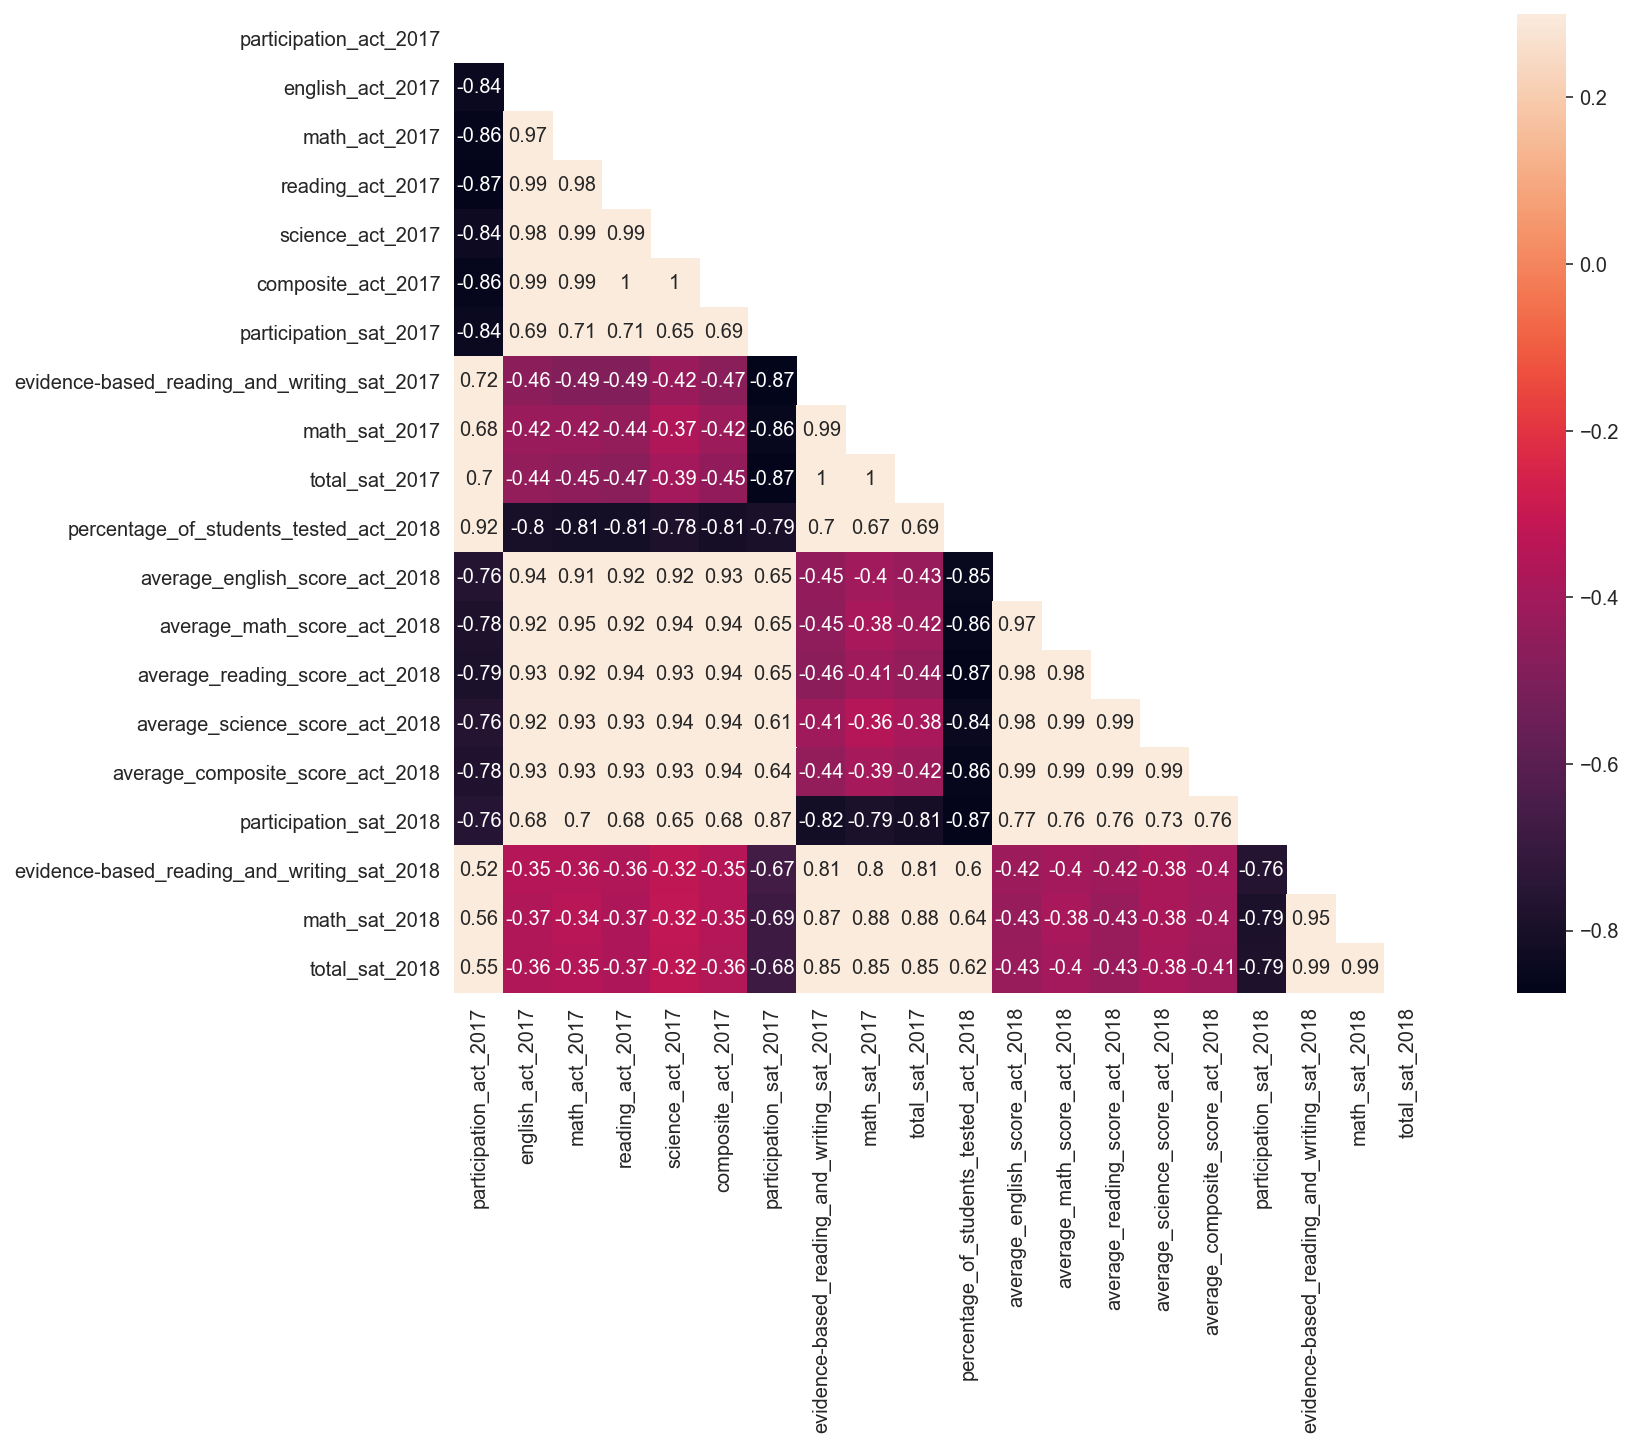

In [99]:
# Establish size of figure.
plt.figure(figsize=(15,9))

# Set up mask to be "True" in the upper triangle.
mask = np.zeros_like(scores.corr())
mask[np.triu_indices_from(mask)] = True

# Plot score's heatmap, while masking the upper triangle to be white.
with sns.axes_style("white"):
    sns.heatmap(scores.corr(),mask=mask, vmax=.3, square=True, annot=True)

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [100]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(15,7)) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column]) # feel free to add more settings
        ax[i].set_title(list_of_titles[i])# Set titles, labels, etc here for each subplot

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

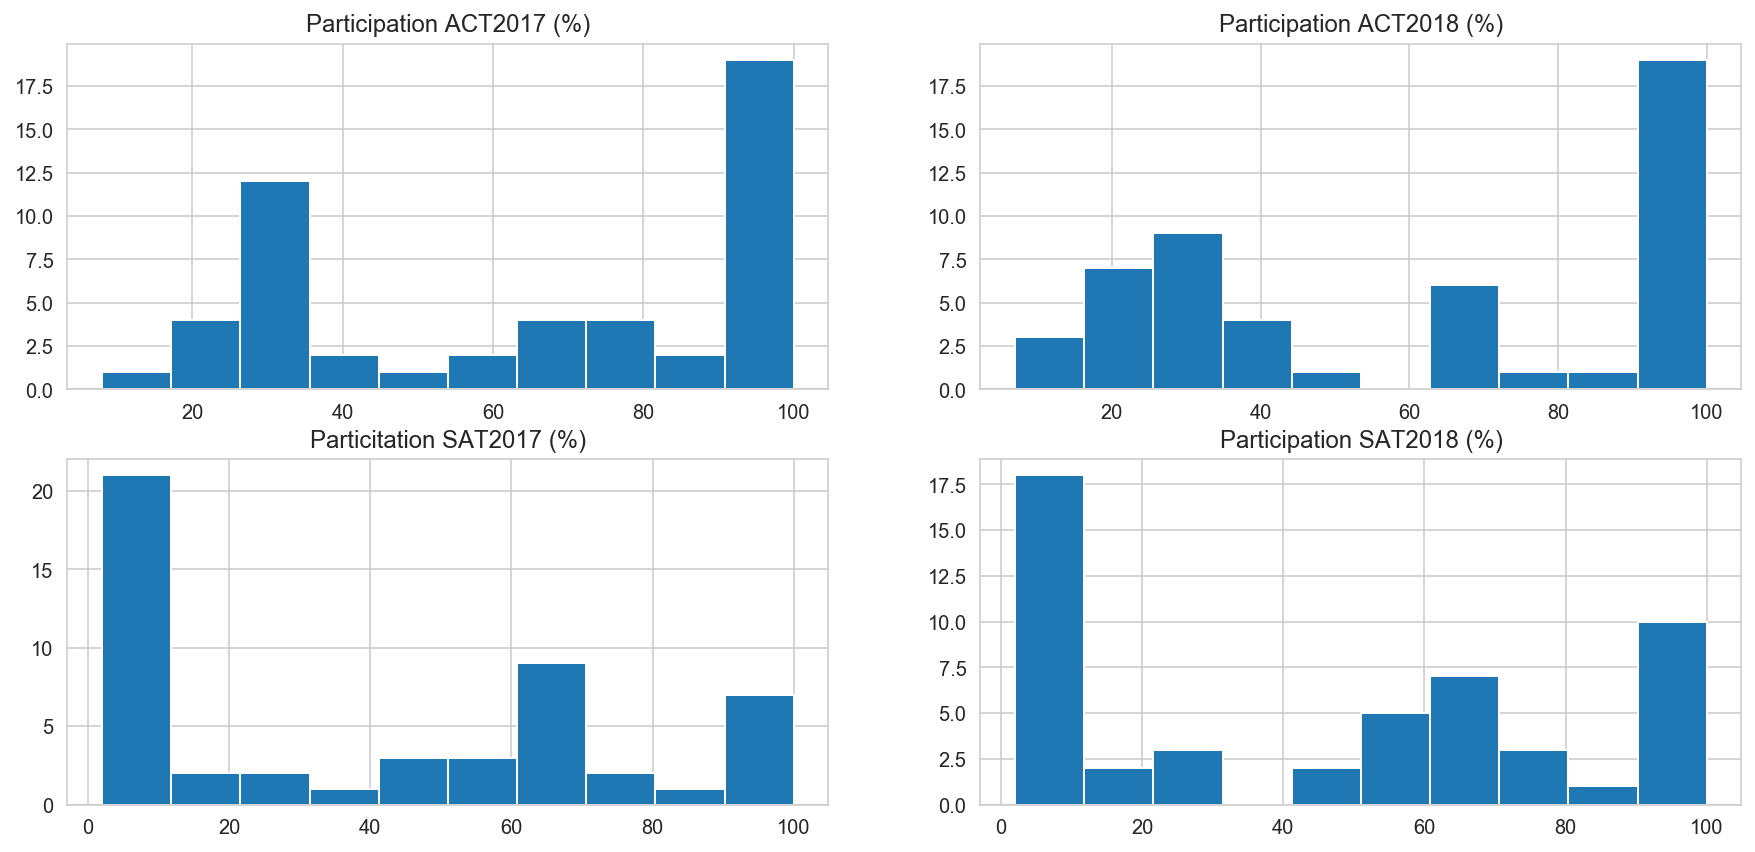

In [102]:
# Participation Rates for SAT & ACT
list_of_labels=['Participation ACT2017 (%)','Participation ACT2018 (%)', 'Particitation SAT2017 (%)','Participation SAT2018 (%)']
list_of_columns=['participation_act_2017','percentage_of_students_tested_act_2018', 'participation_sat_2017','participation_sat_2018']
list_of_xlabels=[]
subplot_histograms(scores ,list_of_columns,list_of_labels,list_of_xlabels)

In [103]:
# ACT in 2017 and 2018 are skewed towards the left, SAT in 2017 and 2018 are skewed towards the right
# There are generally higher participation in ACT than in SAT in both years. 

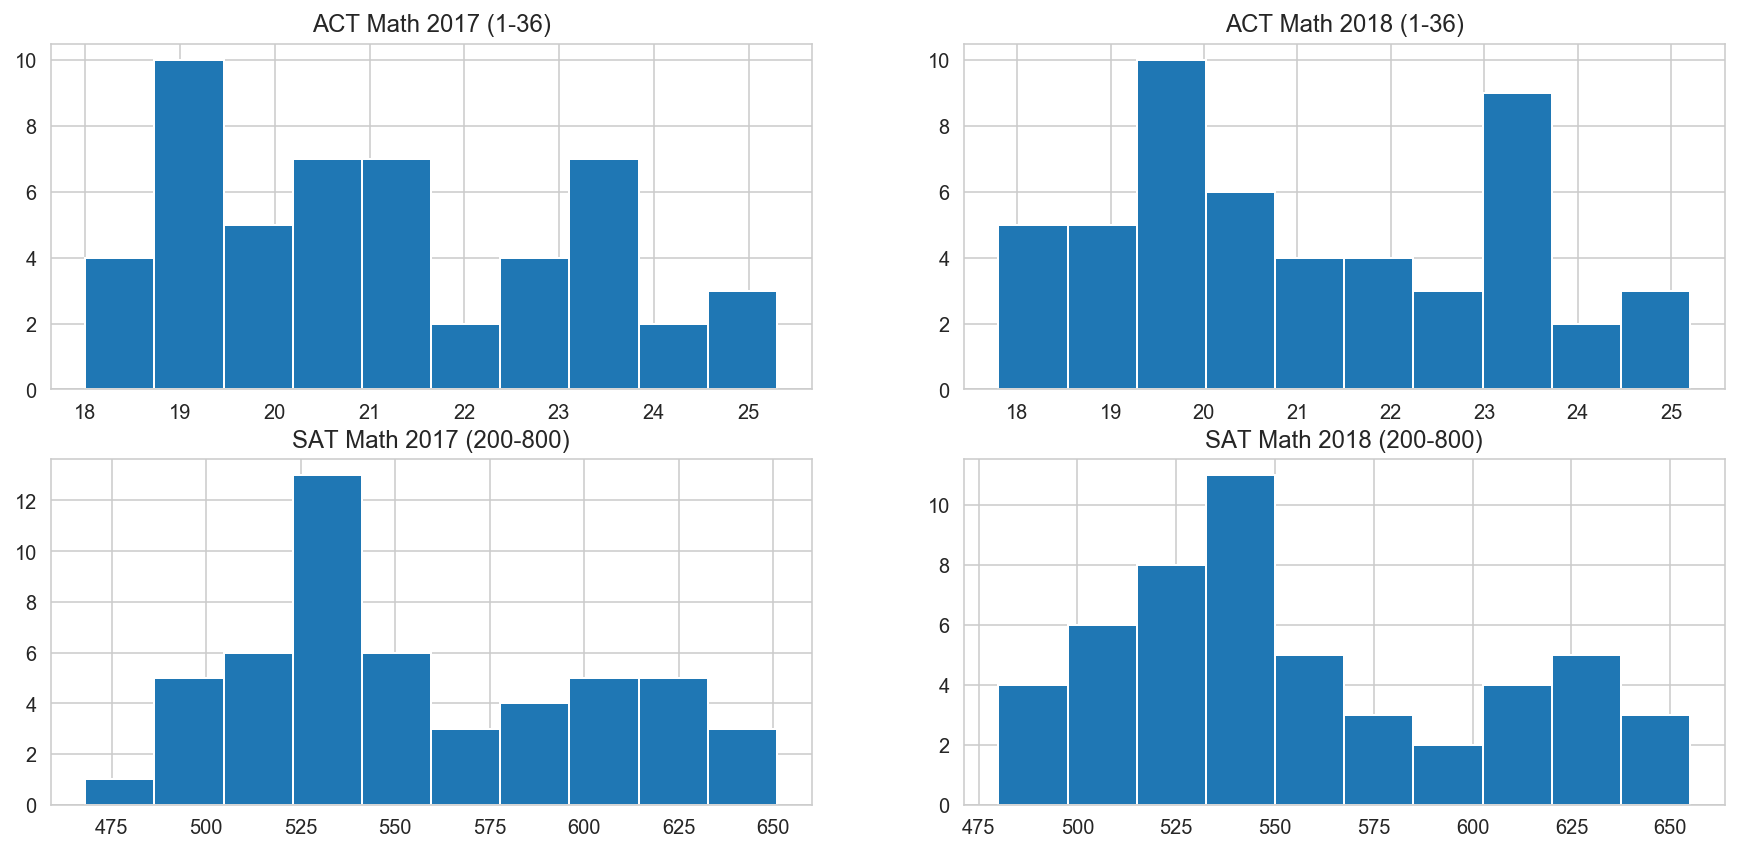

In [104]:
# Math Score for SAT & ACT
list_of_labels=['ACT Math 2017 (1-36)','ACT Math 2018 (1-36)','SAT Math 2017 (200-800)','SAT Math 2018 (200-800)']
list_of_columns=['math_act_2017','average_math_score_act_2018','math_sat_2017','math_sat_2018']
list_of_xlabels=[]
subplot_histograms(scores ,list_of_columns,list_of_labels,list_of_xlabels)

In [105]:
# ACT Math average scores across states seem to have improved since 2017
# There are more states scoring 23-24 in 2018 than in 2017
# Both ACT Math 2017 and 2018 average scores are skewed towards the right 

# SAT Math average scores across states seem to have improved since 2017
# There are more people scoring around 525-550 compared to when in 2017
# Both SAT Math 2017 and 2018 average scores are skewed towards the right

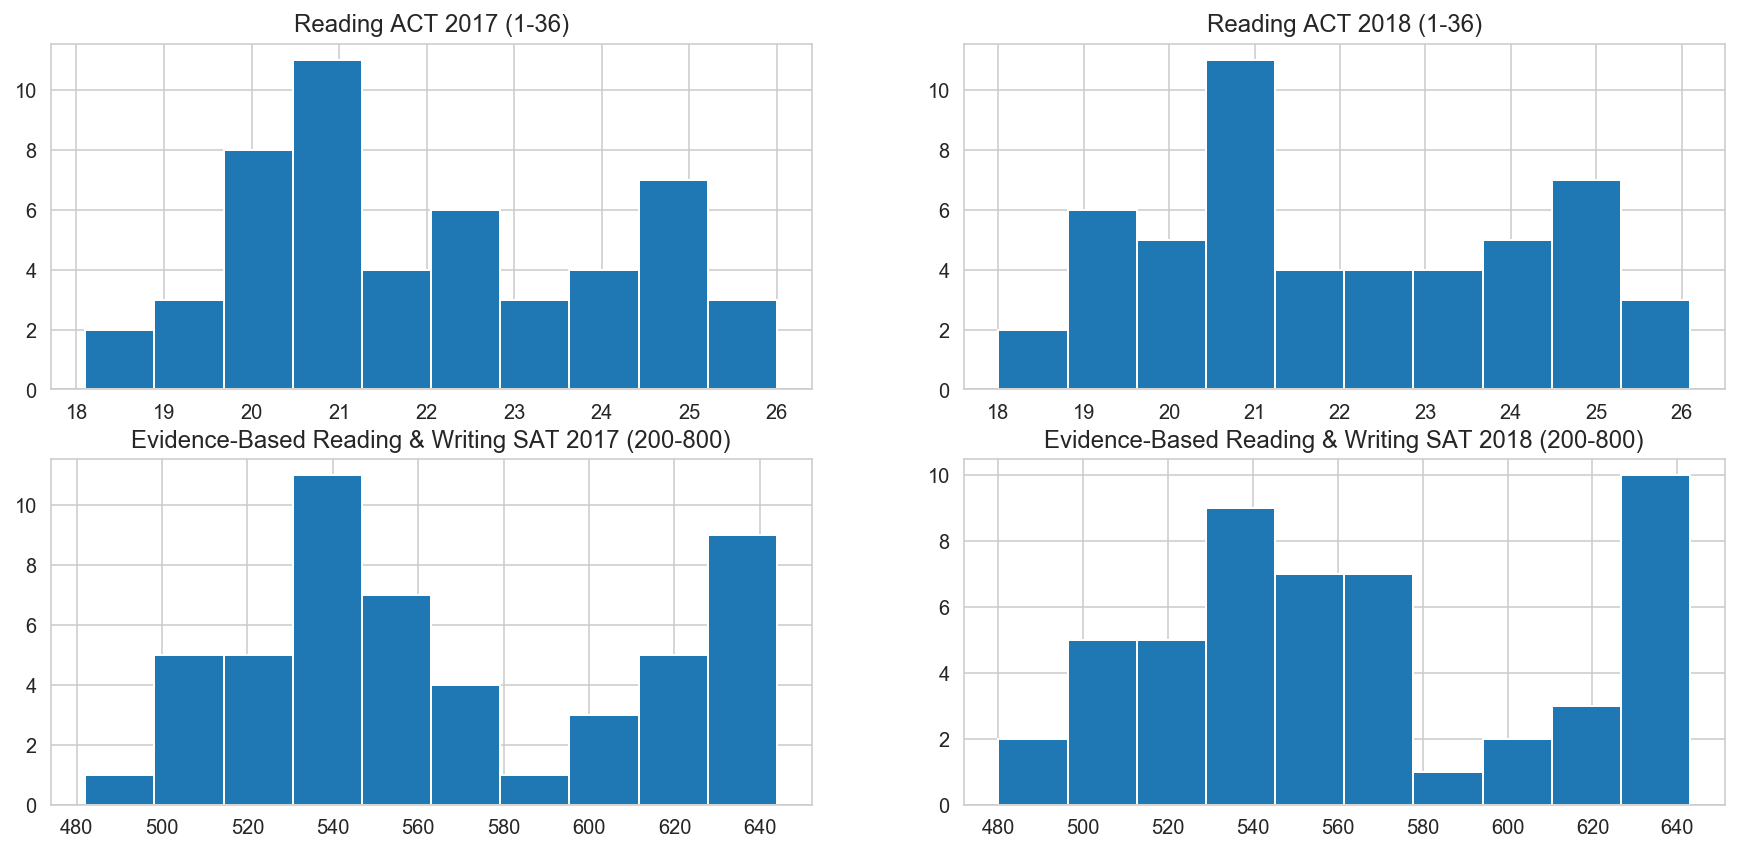

In [106]:
# Reading/Verbal Score for SAT & ACT
list_of_labels=['Reading ACT 2017 (1-36)','Reading ACT 2018 (1-36)','Evidence-Based Reading & Writing SAT 2017 (200-800)','Evidence-Based Reading & Writing SAT 2018 (200-800)']
list_of_columns=['reading_act_2017','average_reading_score_act_2018','evidence-based_reading_and_writing_sat_2017','evidence-based_reading_and_writing_sat_2018']
list_of_xlabels=[]
subplot_histograms(scores ,list_of_columns,list_of_labels,list_of_xlabels)

In [107]:
# Reading ACT 2017 and 2018 average scores are skewed towards the right
# In both 2017 and 2018, most states sorce about 21 points out of 36
# There seem to be a small increase in the number of states getting higher scores ranging 22-24 points

# There seem to have improvement in the ERW average scores from 2017 to 2018 with more states scoring 560 and 640
# ERW SAT 2017 and 2018 are skewed towards the left, 

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


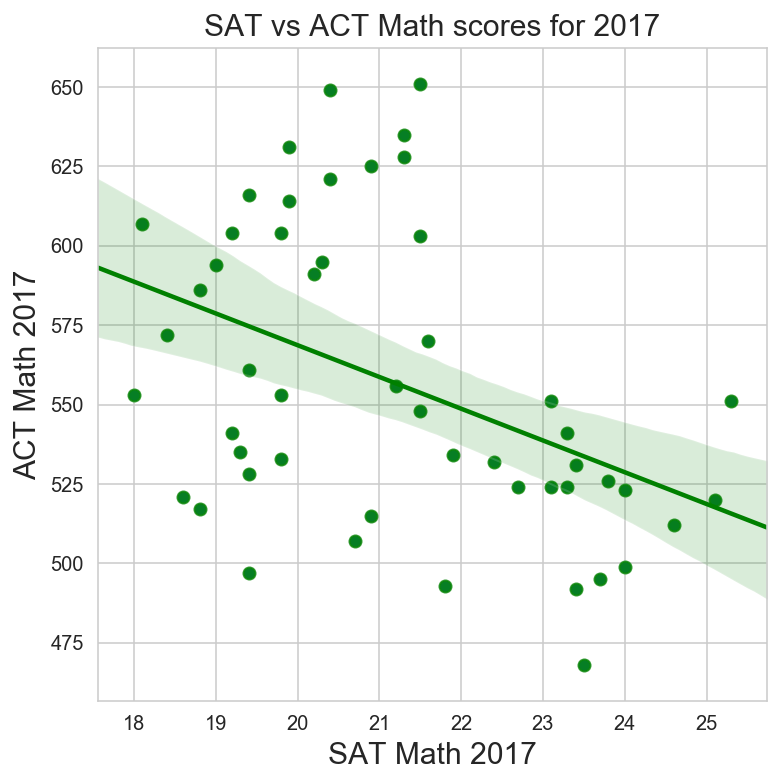

In [108]:
# SAT vs ACT Math scores for 2017
plt.figure(figsize=(6, 6))

sns.scatterplot(x='math_act_2017', y='math_sat_2017', data=scores)
sns.regplot(x='math_act_2017', y='math_sat_2017',
            fit_reg=True, color='g', data=scores)

plt.title("SAT vs ACT Math scores for 2017", fontsize = 15)
plt.ylabel("ACT Math 2017", fontsize = 15)
plt.xlabel("SAT Math 2017", fontsize = 15);

In [109]:
# There seem to have an inverse relationship between ACT and SAT Math score in 2017
# States that did poorly in SAT tend to do better in ACT, vice-versa
# There's absolutely no states in the top right quadrant even. 
# - There are no states who did well in both SAT and ACT Math subject in 2017
# there is no strong correlation between SAT and ACT Math scores in 2017, it is quite loosely spreaded. 

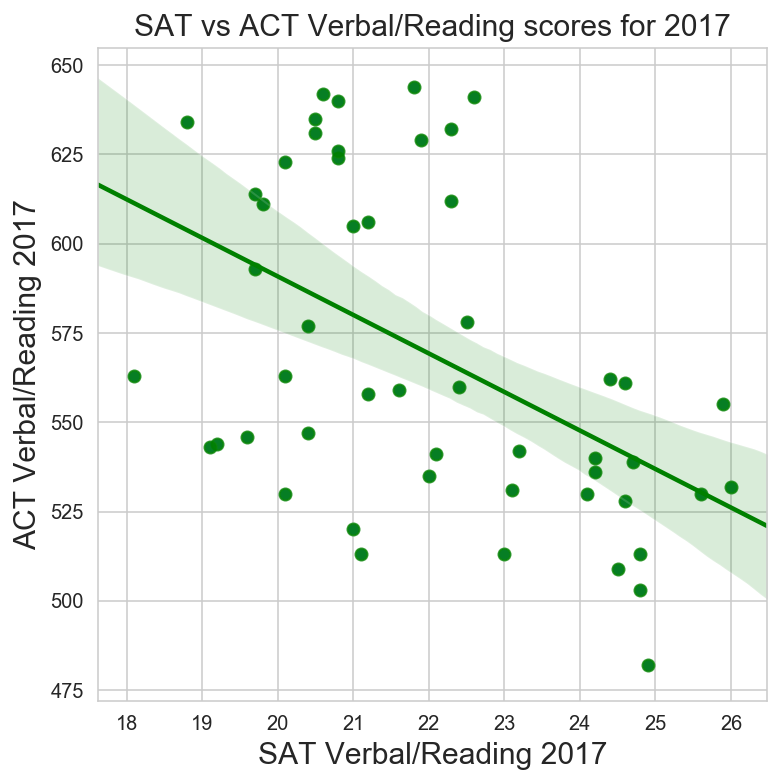

In [110]:
# SAT vs ACT verbal/reading scores for 2017
plt.figure(figsize=(6, 6))

sns.scatterplot(x='reading_act_2017', y='evidence-based_reading_and_writing_sat_2017', data=scores)
sns.regplot(x='reading_act_2017', y='evidence-based_reading_and_writing_sat_2017',
            fit_reg=True, color='g', data=scores)

plt.title("SAT vs ACT Verbal/Reading scores for 2017", fontsize = 15)
plt.ylabel("ACT Verbal/Reading 2017", fontsize = 15)
plt.xlabel("SAT Verbal/Reading 2017", fontsize = 15);

In [111]:
# There seem to have 2 cluttered regions at upper left and lower right region
# -there is a handful no. of states that scored well in ACT Verbal/Reading but with low SAT Verbal/Reading Scores
# -there is a handful no. of states that scored well in SAT verbal/Reading but with low ACT Verbal/Reading Scores
# States that did poorly in SAT tend to do better in ACT, vice-versa
# There's absolutely no states in the top right quadrant even
# - There are no states who did well in both SAT and ACT Verbal/Reading subject in 2017
# there is a not much correlation between SAT and ACT Verbal/Reading scores in 2017, it is quite loosely spreaded. 

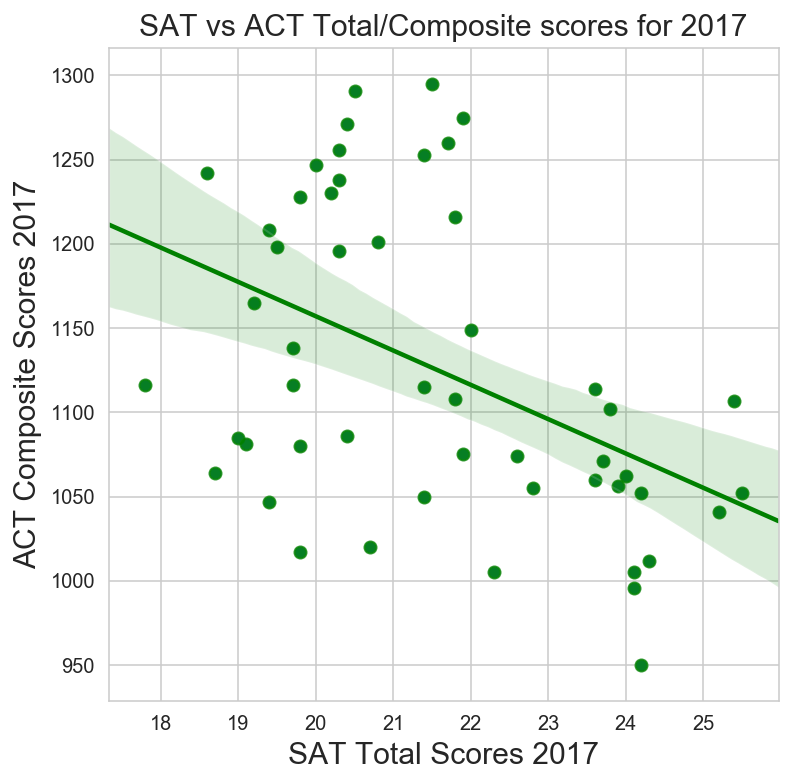

In [112]:
#SAT vs. ACT total/composite scores for 2017
plt.figure(figsize=(6, 6))

sns.scatterplot(x='composite_act_2017', y='total_sat_2017', data=scores)
sns.regplot(x='composite_act_2017', y='total_sat_2017',
            fit_reg=True, color='g', data=scores)

plt.title("SAT vs ACT Total/Composite scores for 2017", fontsize = 15)
plt.ylabel("ACT Composite Scores 2017", fontsize = 15)
plt.xlabel("SAT Total Scores 2017", fontsize = 15);

In [113]:
# There seem to have 2 cluttered regions at upper left and lower right region
# -there is a handful no. of states that have high ACT Composite Scores but with low SAT Total Scores
# -there is a handful no. of states that have low SAT Total Scores but with high ACT Composite Scores
# States that did poorly in SAT tend to do better in ACT, vice-versa
# There's absolutely no states in the top right quadrant
# - There are no states who did well in both SAT and ACT in 2017
# there is a not much correlation between SAT and ACT Total/Composite scores in 2017, it is quite loosely spread. 

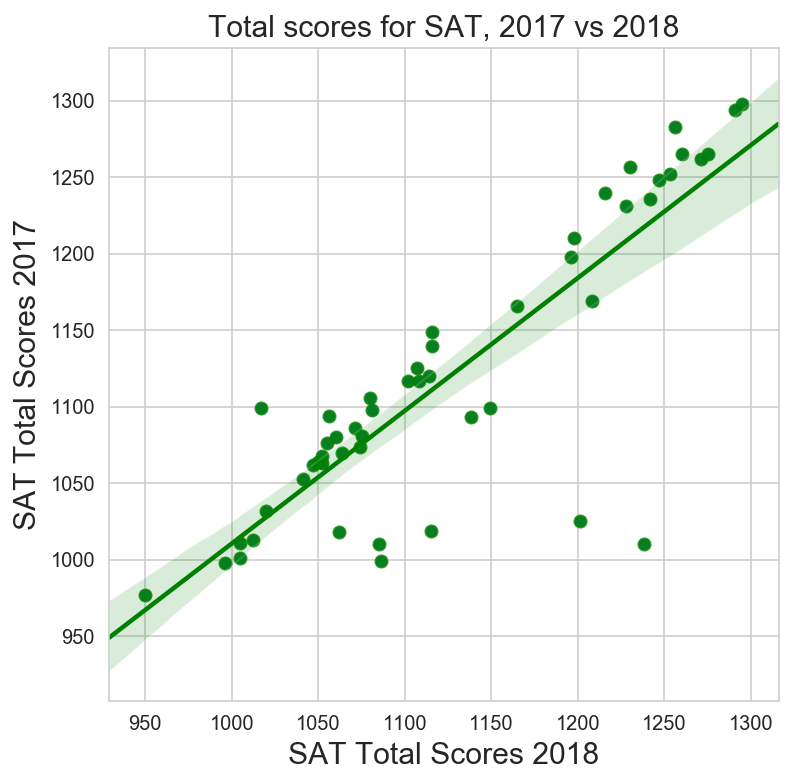

In [114]:
#Total scores for SAT 2017 vs. 2018
plt.figure(figsize=(6, 6))

sns.scatterplot(x='total_sat_2017', y='total_sat_2018', data=scores)
sns.regplot(x='total_sat_2017', y='total_sat_2018',
            fit_reg=True, color='g', data=scores)

plt.title("Total scores for SAT, 2017 vs 2018", fontsize = 15)
plt.ylabel("SAT Total Scores 2017", fontsize = 15)
plt.xlabel("SAT Total Scores 2018", fontsize = 15);

In [115]:
# There seem to have 2 cluttered regions at lower left and upper right region
# -there is a handful no. of states that have high SAT Total Scores in 2017 and with SAT Total Scores in 2018
# -there is a handful no. of states that have low SAT Total Scores in 2017 and with low SAT Total Scores in 2018
# States that did good in SAT 2017 tend to do good in SAT 2018, vice-versa
# There's absolutely no states in the top left quadrant
# - There are no states who did well in SAT 2017 and poor in SAT in 2018
# There is some outlier in the lower right quadrant
# - there are just 2 states that had an improvement in their total SAT score in 2018 compared to when in 2017
# there is a positive correlation between SAT 2017 and SAT 2018 Total scores, (R-value is_____ )

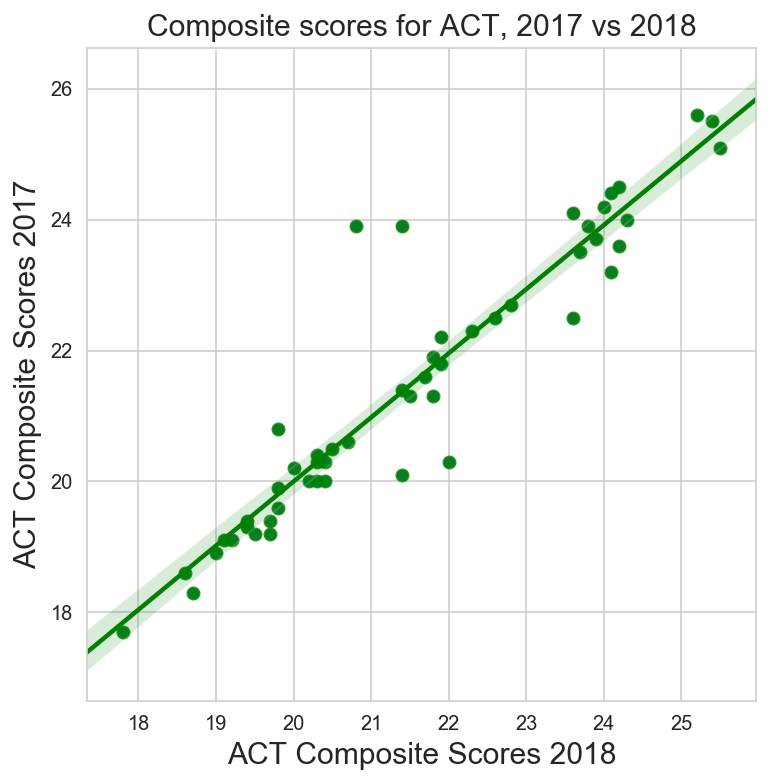

In [116]:
#Composite scores for ACT 2017 vs. 2018
plt.figure(figsize=(6, 6))

sns.scatterplot(x='composite_act_2017', y='average_composite_score_act_2018', data=scores)
sns.regplot(x='composite_act_2017', y='average_composite_score_act_2018',
            fit_reg=True, color='g', data=scores)

plt.title("Composite scores for ACT, 2017 vs 2018", fontsize = 15)
plt.ylabel("ACT Composite Scores 2017", fontsize = 15)
plt.xlabel("ACT Composite Scores 2018", fontsize = 15);

In [117]:
# States that did good in ACT 2017 tend to do good in ACT 2018, vice-versa
# There's absolutely no states in the bottom right quadrant
# - There are no states who did poorly in ACT 2017 and well in ACT in 2018
# There is some outlier in the upper left quadrant
# - there are just 2 states that did not have improvemnt in their total SAT score in 2018 compared to when in 2017
# there is a positive correlation between SAT 2017 and SAT 2018 Total scores, (R-value is _____)

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

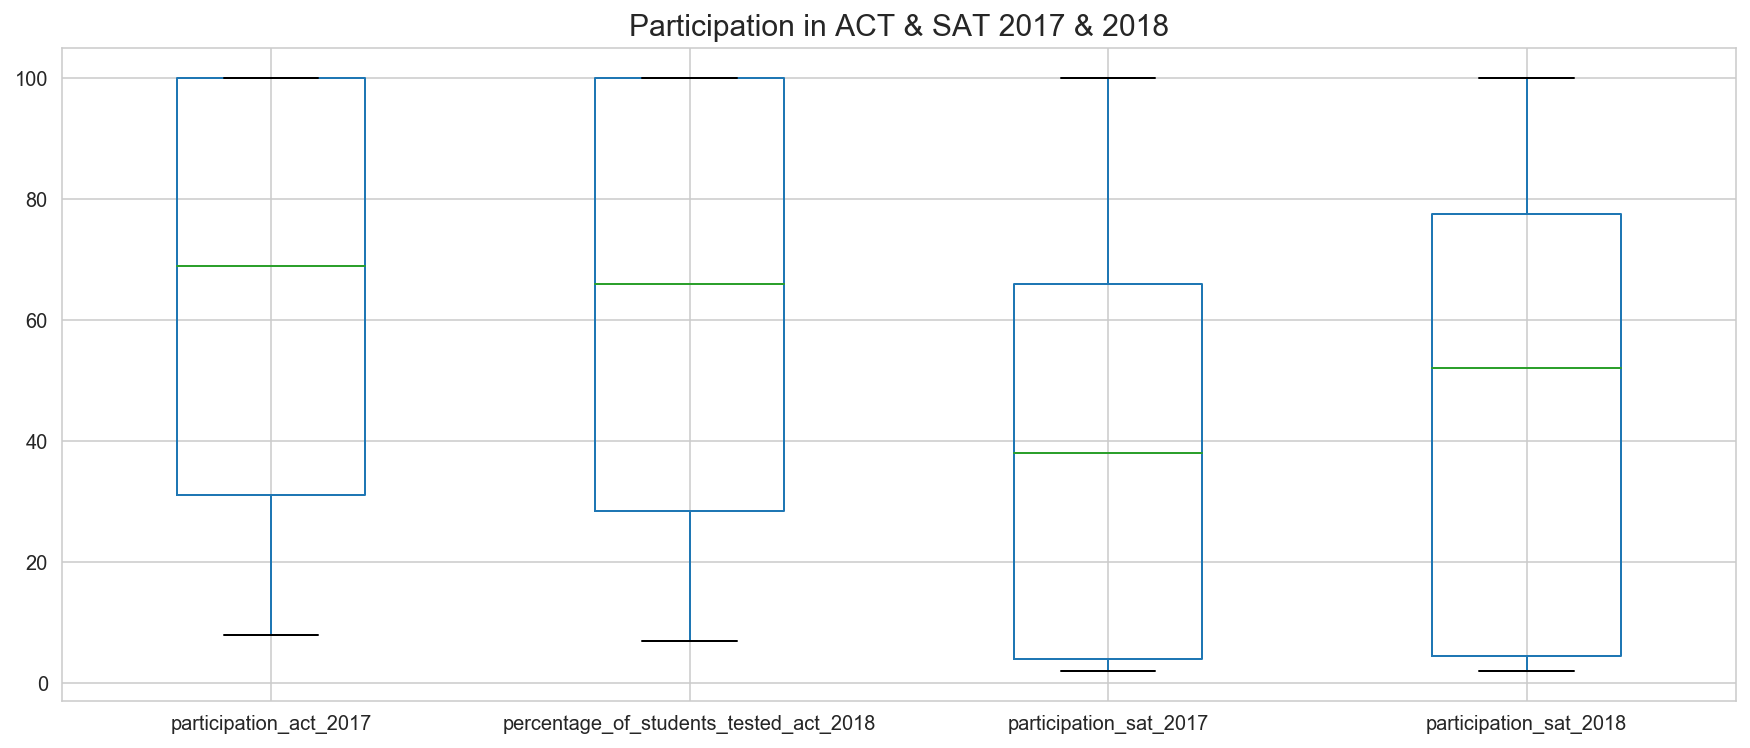

In [118]:
#Participation ACT & SAT, 2017 & 2018
plt.figure(figsize=(15, 6))
plt.title("Participation in ACT & SAT 2017 & 2018", fontsize = 15)
scores.boxplot(column=['participation_act_2017','percentage_of_students_tested_act_2018',
                       'participation_sat_2017','participation_sat_2018'])

In [119]:
# the no. of states that participated in ACT 2017 and 2018 is relatively the same in both years
# the no. of states that participated in SAT in 2018 seem to increase compared to 2017, the mean increased in 2018

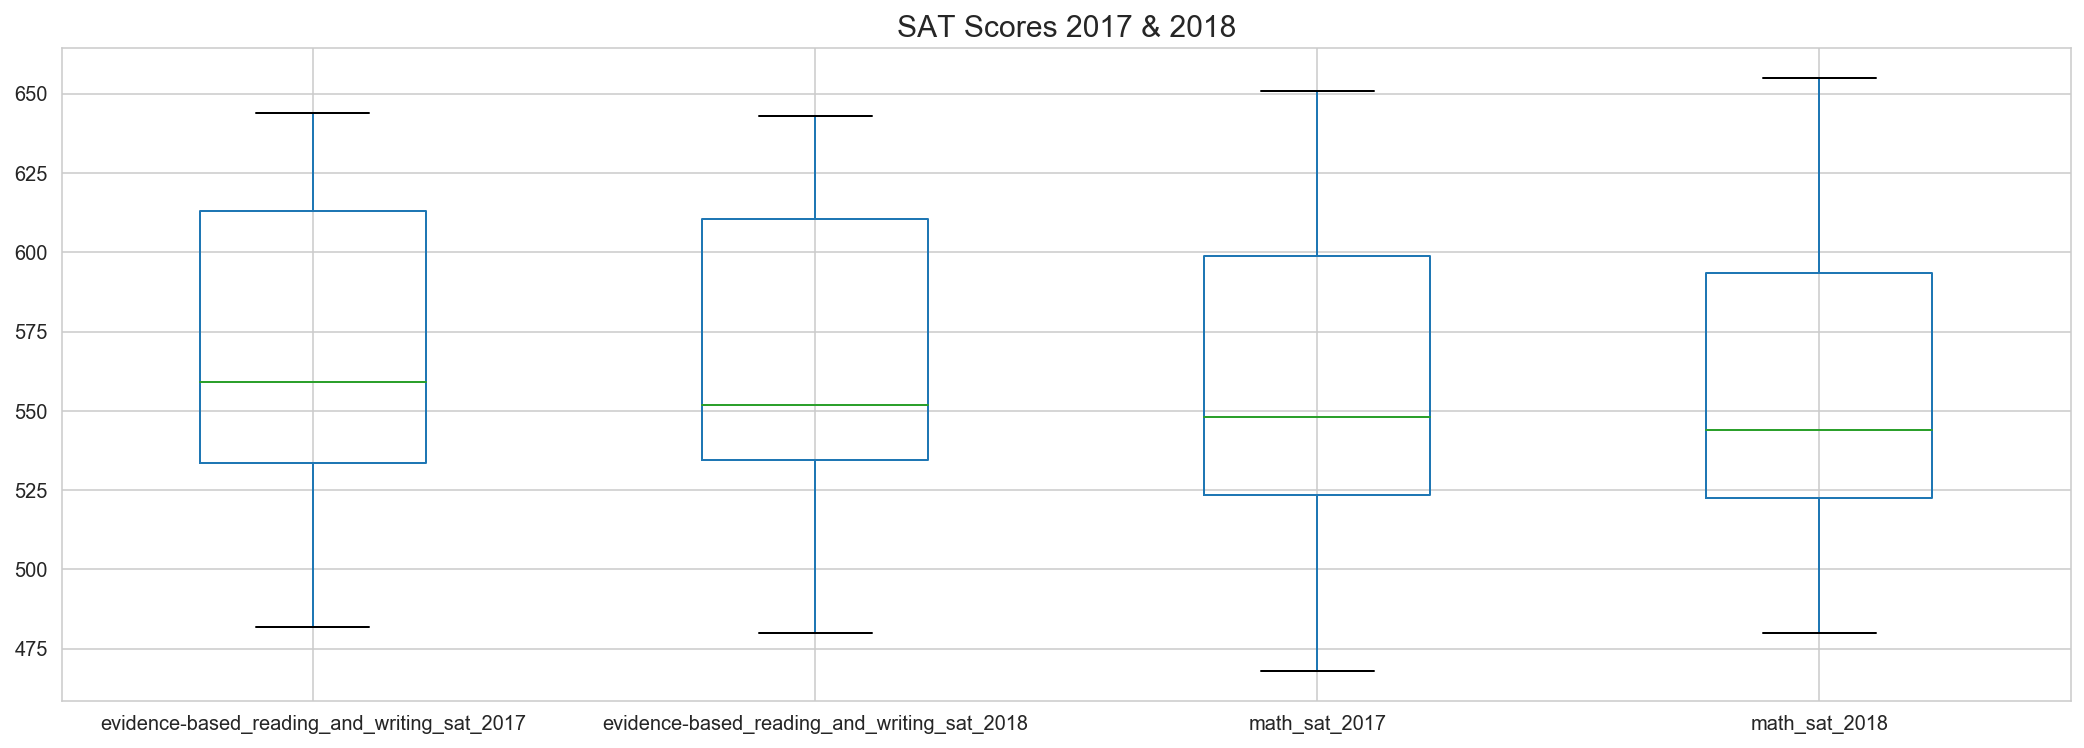

In [136]:
# SAT 2017 & 2018 subject scores
plt.figure(figsize=(18, 6))
plt.title("SAT Scores 2017 & 2018", fontsize = 15)
scores.boxplot(column=['evidence-based_reading_and_writing_sat_2017','evidence-based_reading_and_writing_sat_2018',
                       'math_sat_2017','math_sat_2018'])

In [ ]:
# ERW17 have a higher mean score compared to ERW2018, spread is about the same. 
# Math17 have a higher mean score compared to Math18. 
# Math score generally improved compared to 2017 looking at the improved min and max scores 

# Students taking SAT tend to score very slightly better at ERW than in math subject. 

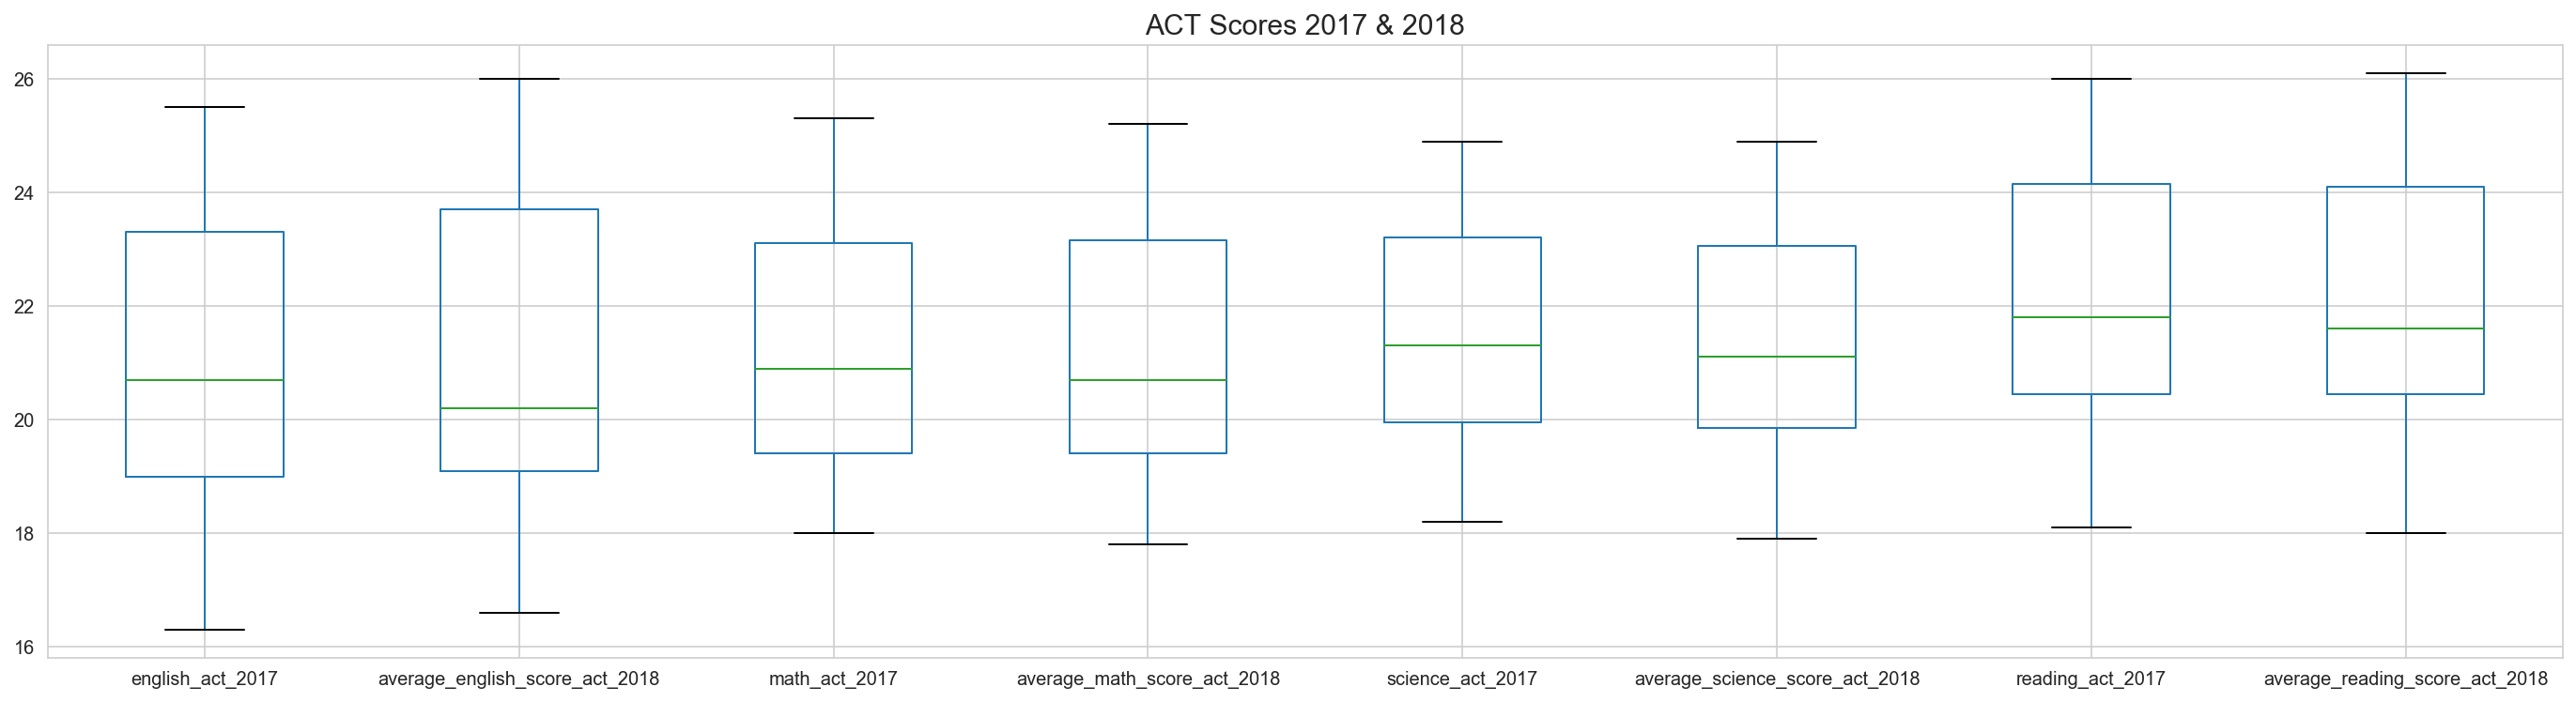

In [134]:
# ACT 2017 & 2018 subject scores
plt.figure(figsize=(24, 6))
plt.title("ACT Scores 2017 & 2018", fontsize = 15)
scores.boxplot(column=['english_act_2017', 'average_english_score_act_2018',
                      'math_act_2017', 'average_math_score_act_2018',
                      'science_act_2017', 'average_science_score_act_2018',
                      'reading_act_2017', 'average_reading_score_act_2018'])


In [ ]:
# English scores improved in 2018 in terms of spread, but have a lower mean score.
# Math scores are around the same in 2017 and 2018
# Science scores are around the same in 2017 and 2018
# Reading score have a slight decrease in mean score in 2018 compared to 2017

# Students taking ACT tend to score better in reading than in english/math/science.
# Mean score of Reading is higher than all the other 3 subjects. 

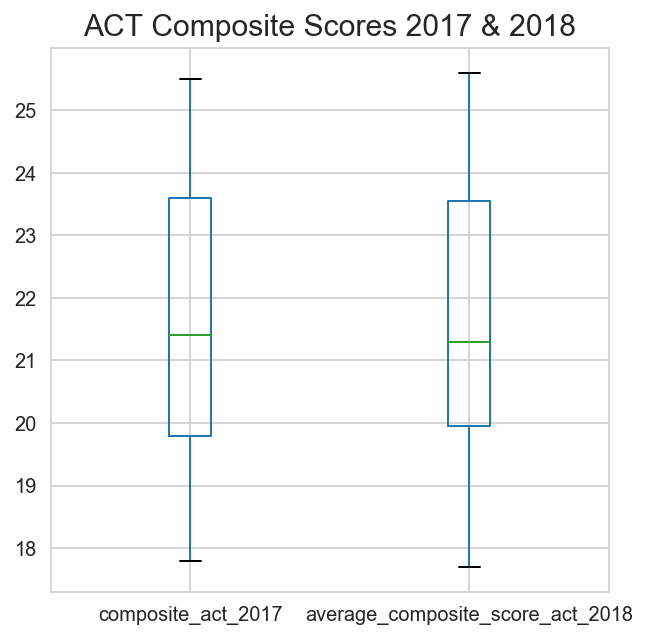

In [122]:
plt.figure(figsize=(5, 5))
plt.title("ACT Composite Scores 2017 & 2018", fontsize = 15)
scores.boxplot(column=['composite_act_2017', 'average_composite_score_act_2018'])

In [ ]:
# Most states are scoring between 18 to 25 for both years, both years have similiar mean composite scores

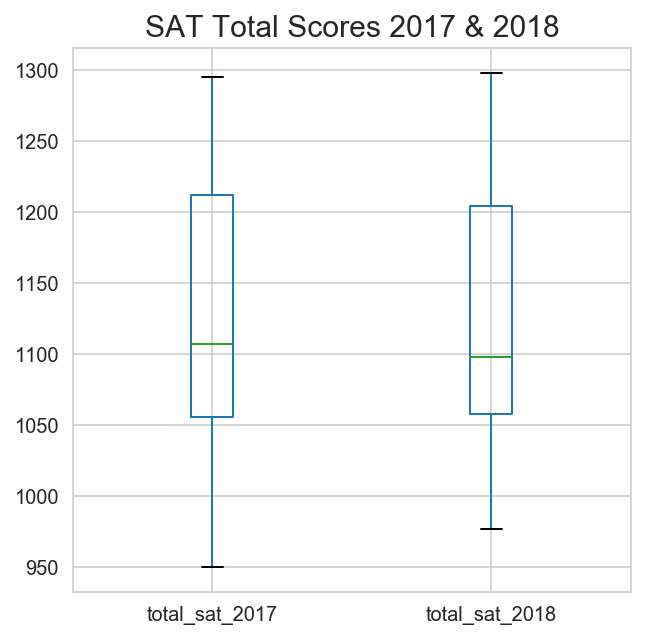

In [135]:
plt.figure(figsize=(5, 5))
plt.title("SAT Total Scores 2017 & 2018", fontsize = 15)
scores.boxplot(column=['total_sat_2017', 'total_sat_2018'])

In [ ]:
# Most states are scoring between 950 to 1300 for both years, both years have similiar mean Total scores

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

Histogram:
    
    ACT in 2017 and 2018 are skewed towards the left, SAT in 2017 and 2018 are skewed towards the right
    There are generally higher participation in ACT than in SAT in both years. 

    ACT Math average scores across states seem to have improved since 2017
    There are more states scoring 23-24 in 2018 than in 2017
    Both ACT Math 2017 and 2018 average scores are skewed towards the right 

    SAT Math average scores across states seem to have improved since 2017
    There are more people scoring around 525-550 compared to when in 2017
    Both SAT Math 2017 and 2018 average scores are skewed towards the right
    
    Reading ACT 2017 and 2018 average scores are skewed towards the right
    In both 2017 and 2018, most states sorce about 21 points out of 36
    There seem to be a small increase in the number of states getting higher scores ranging 22-24 points

    There seem to have improvement in the ERW average scores from 2017 to 2018 with more states scoring 560 and 640
    ERW SAT 2017 and 2018 are skewed towards the left

Scatterplots:

    There seem to have an inverse relationship between ACT and SAT Math score in 2017
    States that did poorly in SAT tend to do better in ACT, vice-versa
    There's absolutely no states in the top right quadrant even. 
    - There are no states who did well in both SAT and ACT Math subject in 2017
    there is no strong correlation between SAT and ACT Math scores in 2017, it is quite loosely spreaded. 
    
    There seem to have 2 cluttered regions at upper left and lower right region
    -there is a handful no. of states that scored well in ACT Verbal/Reading but with low SAT Verbal/Reading Scores
    -there is a handful no. of states that scored well in SAT verbal/Reading but with low ACT Verbal/Reading Scores
    States that did poorly in SAT tend to do better in ACT, vice-versa
    There's absolutely no states in the top right quadrant even
    - There are no states who did well in both SAT and ACT Verbal/Reading subject in 2017
    There is a not much correlation between SAT and ACT Verbal/Reading scores in 2017, it is quite looselyspreaded. 
    
    There seem to have 2 cluttered regions at upper left and lower right region
    -there is a handful no. of states that have high ACT Composite Scores but with low SAT Total Scores
    -there is a handful no. of states that have low SAT Total Scores but with high ACT Composite Scores
    States that did poorly in SAT tend to do better in ACT, vice-versa
    There's absolutely no states in the top right quadrant
    - There are no states who did well in both SAT and ACT in 2017
    There is a not much correlation between SAT and ACT Total/Composite scores in 2017, it is quite loosely spread. 
    
    There seem to have 2 cluttered regions at lower left and upper right region
    -there is a handful no. of states that have high SAT Total Scores in 2017 and with SAT Total Scores in 2018
    -there is a handful no. of states that have low SAT Total Scores in 2017 and with low SAT Total Scores in 2018
    States that did good in SAT 2017 tend to do good in SAT 2018, vice-versa
    There's absolutely no states in the top left quadrant
    There are no states who did well in SAT 2017 and poor in SAT in 2018
    There is some outlier in the lower right quadrant
    - there are just 2 states that had an improvement in their total SAT score in 2018 compared to when in 2017
    there is a positive correlation between SAT 2017 and SAT 2018 Total scores, (R vlaue = ........)
    

#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

Answer: From histogram, we cant really tell if the distribution is normal or not. 

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

Answer: For now the distribution shwon in the Histogram did not really show any normally distribution, we will need more samples to judge how normal the data can be. 
In this case, with N>30, we can assume normal distribution based on CLT

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

Answer: yes it is appropriate as the number of students taking the test in 2017 is the same.

##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

Why or why not?

Answer:it is inappropriate as the number of students taking SAT and ACT is different.

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

Null Hypo: there is no difference in participation rate in SAT 2017 and ACT 2017
    - mean(participation ACT 2017) = mean(participation SAT 2017)
Alt Hypo: thre is difference in participation rate in SAT 2017 and ACT 2017
    - mean(participation ACT2017) != mean(participation SAT2017)

In [124]:
#comparing participation rate in 2017 for ACT and SAT 

In [125]:
## getting p-value for ACT/SAT 2017
t_stat,p_value = stats.ttest_ind(scores['participation_sat_2017'],scores['participation_act_2017'],equal_var=False)
(t_stat,p_value)

(-3.808577890817054, 0.00024238408285306908)

In [126]:
# p-value is < alpha = 0.05, hence null hypo is rejected. 
# there is a difference in participation of ACT17 and SAT17

Null Hypo: there is no difference in participation rate in SAT 2018 and ACT 2018
    - mean(participation ACT 2018) = mean(participation SAT 2018)
Alt Hypo: thre is difference in participation rate in SAT 2018 and ACT 2018
    - mean(participation ACT2018) != mean(participation SAT2018)

In [127]:
#comparing participation rate in 2017 for ACT and SAT 

In [128]:
# getting p-value for ACT/SAT 2018
t_stat,p_value = stats.ttest_ind(scores['participation_sat_2018'],scores['percentage_of_students_tested_act_2018'],equal_var=False)
(t_stat,p_value)

(-2.247173766735162, 0.02684447059561333)

In [129]:
# p-value is < alpha = 0.05, hence null hypo is rejected. 
# there is a difference in participation of ACT18 and SAT18

In [130]:
# both p-values are <0.05 and showed significance differences in the participation rates in ACT and SAT in 2017&18
# however there is MORE significance in 2018 than in 2017 as the p-value in 2018 is closer to 0

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

In [131]:
scores.columns

Index(['state', 'participation_act_2017', 'english_act_2017', 'math_act_2017',
       'reading_act_2017', 'science_act_2017', 'composite_act_2017',
       'participation_sat_2017', 'evidence-based_reading_and_writing_sat_2017',
       'math_sat_2017', 'total_sat_2017',
       'percentage_of_students_tested_act_2018',
       'average_english_score_act_2018', 'average_math_score_act_2018',
       'average_reading_score_act_2018', 'average_science_score_act_2018',
       'average_composite_score_act_2018', 'participation_sat_2018',
       'evidence-based_reading_and_writing_sat_2018', 'math_sat_2018',
       'total_sat_2018'],
      dtype='object')

In [132]:
scores[(scores['state'] == 'Colorado')|(scores['state']=='Florida')|(scores['state']=='New York')][['state','participation_act_2017','participation_sat_2017','percentage_of_students_tested_act_2018','participation_sat_2018']]

,state,participation_act_2017,participation_sat_2017,percentage_of_students_tested_act_2018,participation_sat_2018
5,Colorado,100.0,11.0,30,100
9,Florida,73.0,83.0,66,56
32,New York,31.0,67.0,27,79


1) Colorado: Reversed participation pattern

The MOE in Colorado decided to take SAT over ACT in 2001 and the shift began in 2015. 
thus the shift in participation rate. 

https://www.chalkbeat.org/posts/co/2015/12/23/goodbye-act-hello-sat-a-significant-change-for-colorado-high-schoolers/

2) Florida: Participation drop in both ACT and SAT from 2017 to 2018
It is not a requirement to take ACT/SAT in Florida 
Students's mentality to take SAT/ACT isnt alighed with the government direction?

In 2018, there is only specific venue and specific time that SAT can be taken. 
2019 showed 97% in SAT Participation rate, having exams to be taken in class ciriculum, and conducted in schools.

3) New York: Participation increase in both ACT and SAT from 2017 to 2018

It is free to take SAT in New York, hence a shift in participation 

https://chalkbeat.org/posts/ny/2018/01/11/record-number-of-new-york-city-students-take-sat-after-city-offers-test-for-free/

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

Provide free wavier for students to take SAT in lower participating countries